In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.head()

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,Acinonyx_jubatus_S0612_02,1,706,0.083313,0.015951,848.0,263.00,-3.270038,1526.165771,0.101744,18.307605,0.734437,0.117970,-0.008915,2,0.019846,NaN,A,A. jubatus,growl
1,Acinonyx_jubatus_S0612_02,4,3456,0.296424,0.035485,3645.5,452.25,-2.419156,1377.502653,0.625990,18.523777,0.682254,0.112089,-0.009319,21,0.043695,NaN,A,A. jubatus,NaN
2,Acinonyx_jubatus_S0612_02,5,2984,0.171860,0.022913,2181.8,308.00,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.211802,0.006031,8,0.028763,NaN,A,A. jubatus,growl
3,Acinonyx_jubatus_S0612_02,5,3108,0.243933,0.023587,3437.0,314.00,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.147876,0.003965,11,0.028987,NaN,A,A. jubatus,NaN
4,Acinonyx_jubatus_S0612_02,3,1919,0.194653,0.029304,2189.0,331.00,-2.780607,942.326097,0.370894,18.787422,0.632496,0.193519,0.001523,5,0.037000,NaN,A,A. jubatus,growl


In [4]:
df.shape

(606, 20)

In [5]:
df.columns

Index(['File Name', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               606 non-null    object 
 1   Duration_in_Sec         606 non-null    int64  
 2   Zero_Crossings          606 non-null    int64  
 3   Amp_range               606 non-null    float64
 4   Avg_amp                 606 non-null    float64
 5   Freq_range              606 non-null    float64
 6   Pulses_per_Sec          606 non-null    float64
 7   Mean_MFCC               606 non-null    float64
 8   Mean_Spectral Rolloff   606 non-null    float64
 9   Mean_Melspectrogram     606 non-null    float64
 10  Mean_Spectral Contrast  606 non-null    float64
 11  Mean_Chromagram         606 non-null    float64
 12  Mean_Tempogram          606 non-null    float64
 13  Mean_Tonnetz            606 non-null    float64
 14  Partials                606 non-null    in

In [7]:
df.describe(include='all')

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
count,606,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,405,437,606,593
unique,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,18,37
top,Leopardus_Pardalis_SoundsFiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,276,113,220
mean,NaN,5.693069,10375.399340,0.243260,0.024690,4952.482170,670.145633,-5.801938,3754.562957,0.791486,18.499721,0.705104,0.165910,0.002803,13.262376,0.031412,NaN,NaN,NaN,NaN
std,NaN,7.754808,16082.698274,0.245438,0.028946,3276.910697,649.646743,3.084488,1960.387799,2.889716,1.421796,0.088868,0.058358,0.012711,26.573002,0.036578,NaN,NaN,NaN,NaN
min,NaN,1.000000,281.000000,0.003207,0.000551,1.000000,0.000000,-14.324327,472.488169,0.000100,12.954071,0.196460,0.009798,-0.039503,0.000000,0.000694,NaN,NaN,NaN,NaN
25%,NaN,2.000000,2482.250000,0.065170,0.005972,2359.500000,251.725000,-8.660103,2032.147528,0.015124,17.594131,0.652052,0.126073,-0.004758,1.000000,0.007542,NaN,NaN,NaN,NaN
50%,NaN,3.000000,4754.000000,0.168142,0.016122,4133.083333,439.500000,-5.794813,3760.177145,0.132644,18.341881,0.716829,0.161689,0.002083,5.000000,0.020990,NaN,NaN,NaN,NaN
75%,NaN,6.000000,11442.750000,0.319435,0.033408,7638.187500,835.291667,-3.069494,5253.195317,0.580200,19.259454,0.771592,0.214996,0.008241,14.000000,0.042638,NaN,NaN,NaN,NaN


## Data Cleansing

In [8]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'Growl', 'Hiss',
       'Loud rumble/roar', 'Sharp Hiss', 'call', 'unknown', 'growl/hiss',
       'call sequence', 'purr', 'purr sequence', 'main call',
       'call/growl', 'Call sequence(possible mew)', 'mew', 'hiss ',
       'call sequence?', 'single call?', 'call?', 'mew?', 'grow/hiss',
       'Prusten', 'Roaring sequence ', 'Roaring sequence',
       'roaring sequence', 'puff', 'Mew', 'roar', 'roar or call',
       'growl ', 'roar?', 'Growl ', 'Roaring seqeunce',
       'Roaring Sequence'], dtype=object)

In [9]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss','Prusten':'prusten','Roaring sequence ': 'roar','Roaring sequence':'roar', 'roaring sequence':'roar', 'Growl ':'growl',
       'Roaring seqeunce':'roar', 'Roaring Sequence':'roar'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'roar', 'call', 'growl/hiss', 'purr',
       'call/growl', 'mew', 'prusten', 'puff', 'Mew'], dtype=object)

In [10]:
df['Age'].unique()

array(['A', 'Adult', nan, 'Adult ', 'Juvenile ', 'juvenile', 'Juvenile',
       'young ', 'young', 'adult', 'A ', 'adult '], dtype=object)

In [11]:
clean2 = {'A':'Adult','A ':'Adult','Adult ':'Adult','adult':'Juvenile', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile',
          'young':'Juvenile','young ':'Juvenile', 'adult ':'Adult'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Unknown', 'Juvenile'], dtype=object)

In [12]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Male', 'Pair (Unknown)',
       'Female ', 'male ', 'M', 'Unknown', 'Female', 'female ', 'female',
       'male', 'G'], dtype=object)

In [13]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 
          'G (1 M and 2F)':'Group', 'female':'Female','female ':'Female','male':'Male'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [14]:
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded Leopard ',
       'Clouded leopard', 'Jaguar ', 'jaguar', 'Leopard', 'Leopard ',
       'Snow Leopard ', 'L. lynx', 'Bobcat', 'Lion', 'Lion '],
      dtype=object)

In [15]:
clean4 = {'jaguar': 'Jaguar','Jaguar ':'Jaguar','Leopard ':'Leopard', 'Clouded Leopard ':'Clouded leopard','Lion ':'Lion',
          'Snow Leopard ':'Snow leopard'}

df.replace(clean4, inplace= True)
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded leopard',
       'Jaguar', 'Leopard', 'Snow leopard', 'L. lynx', 'Bobcat', 'Lion'],
      dtype=object)

In [16]:
df.describe(include='object')

,File Name,Sex,Age,Species,Call
count,606,606,606,606,587
unique,111,5,3,14,11
top,Leopardus_Pardalis_SoundsFiles,Male,Adult,Ocelot,growl
freq,113,239,393,113,253


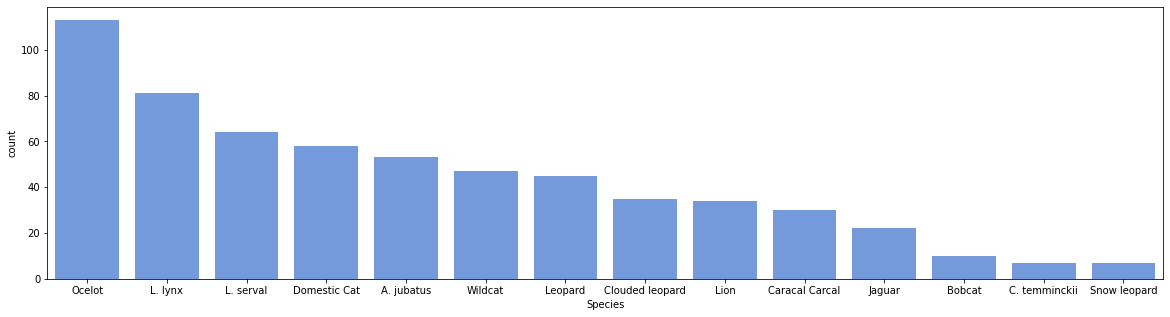

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='Species', data=df,order = df['Species'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

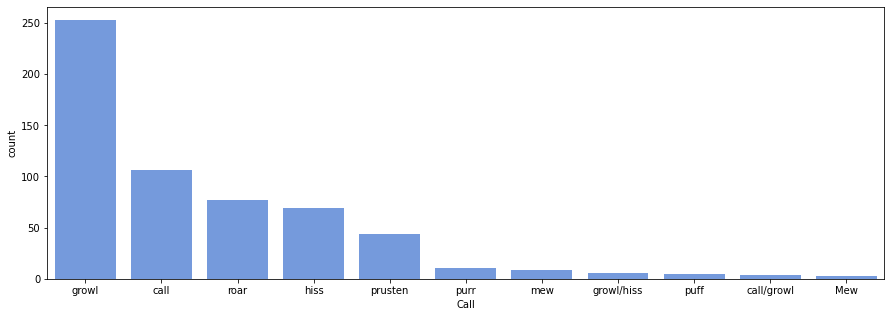

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Call', data=df, order = df['Call'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

<AxesSubplot:>

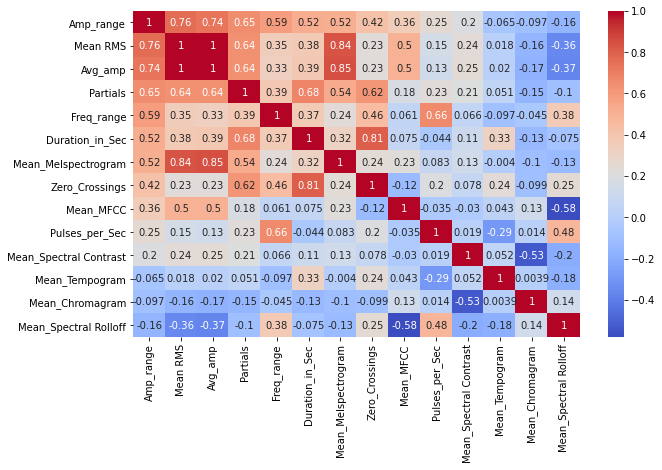

In [19]:
#Quality correlation matrix
k = 14 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

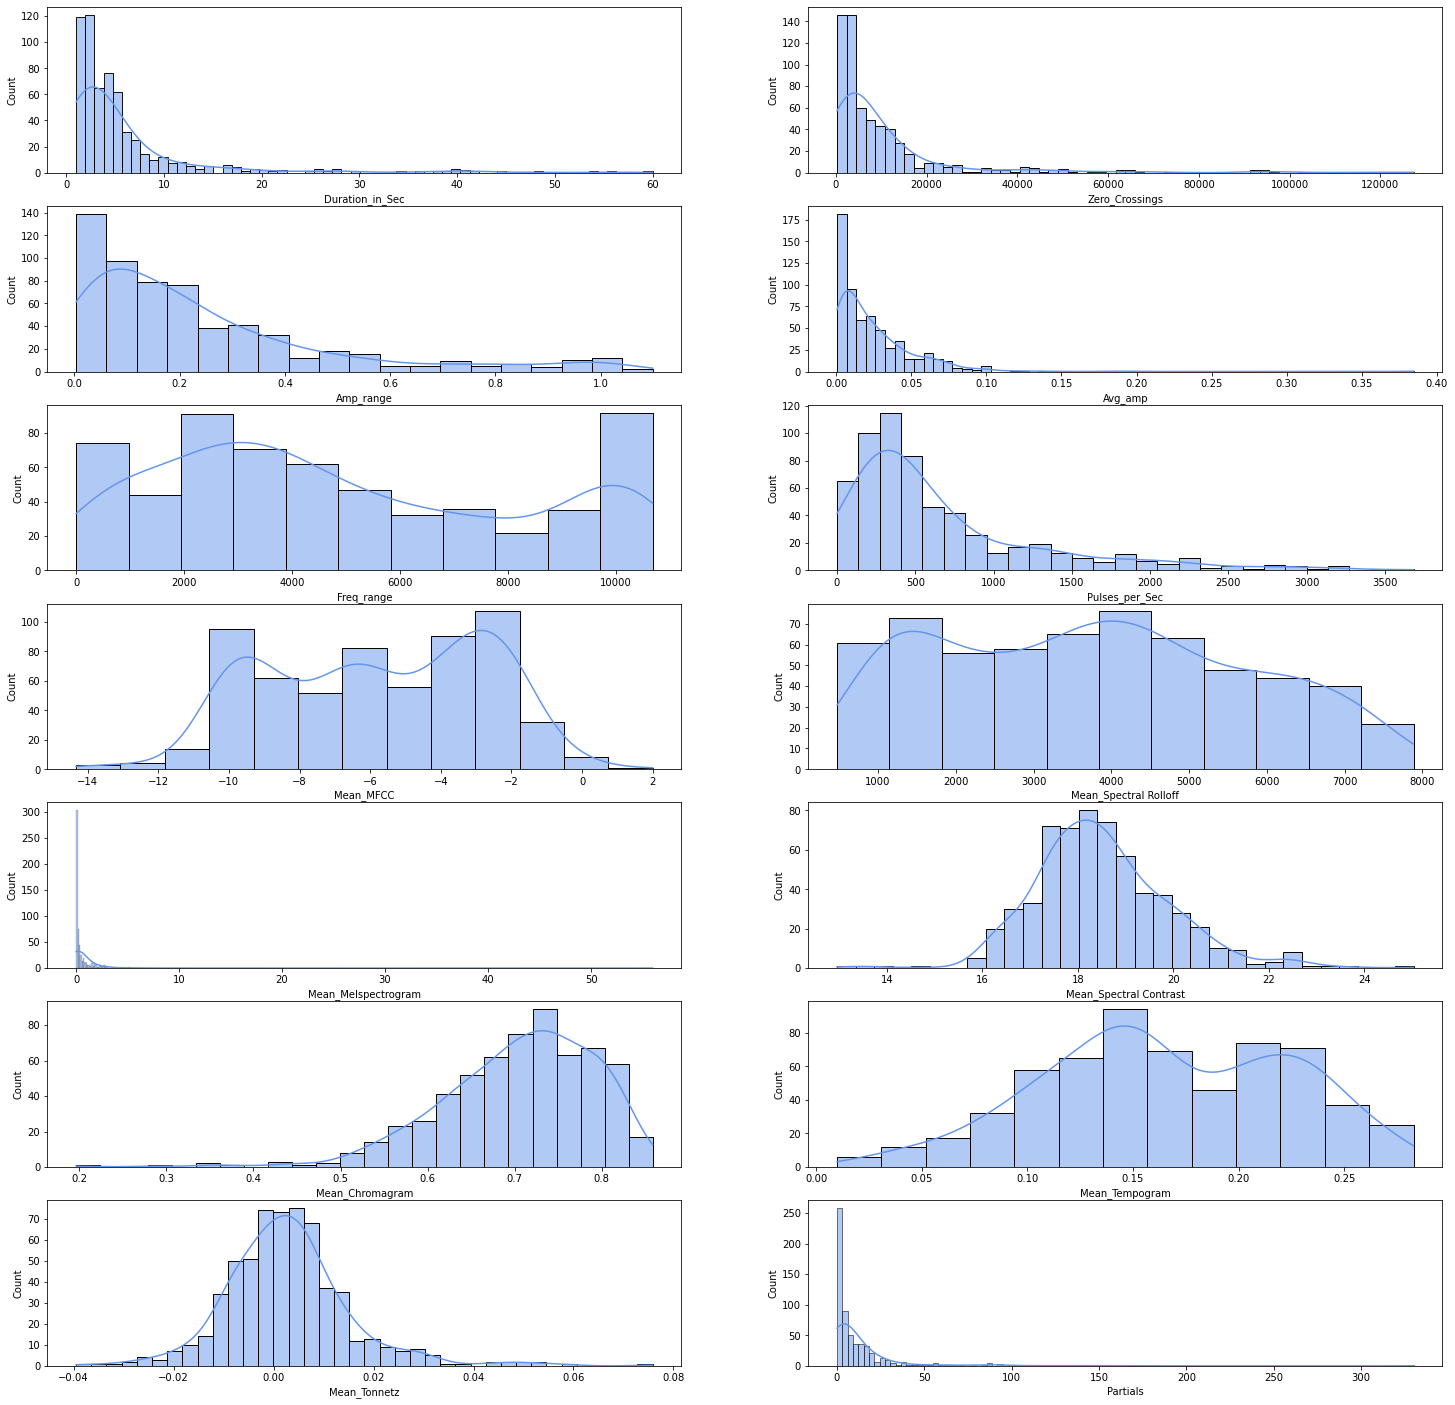

In [20]:
#Histogram to check distribution and skewness
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(25,25))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True,color='cornflowerblue') 
plt.show()

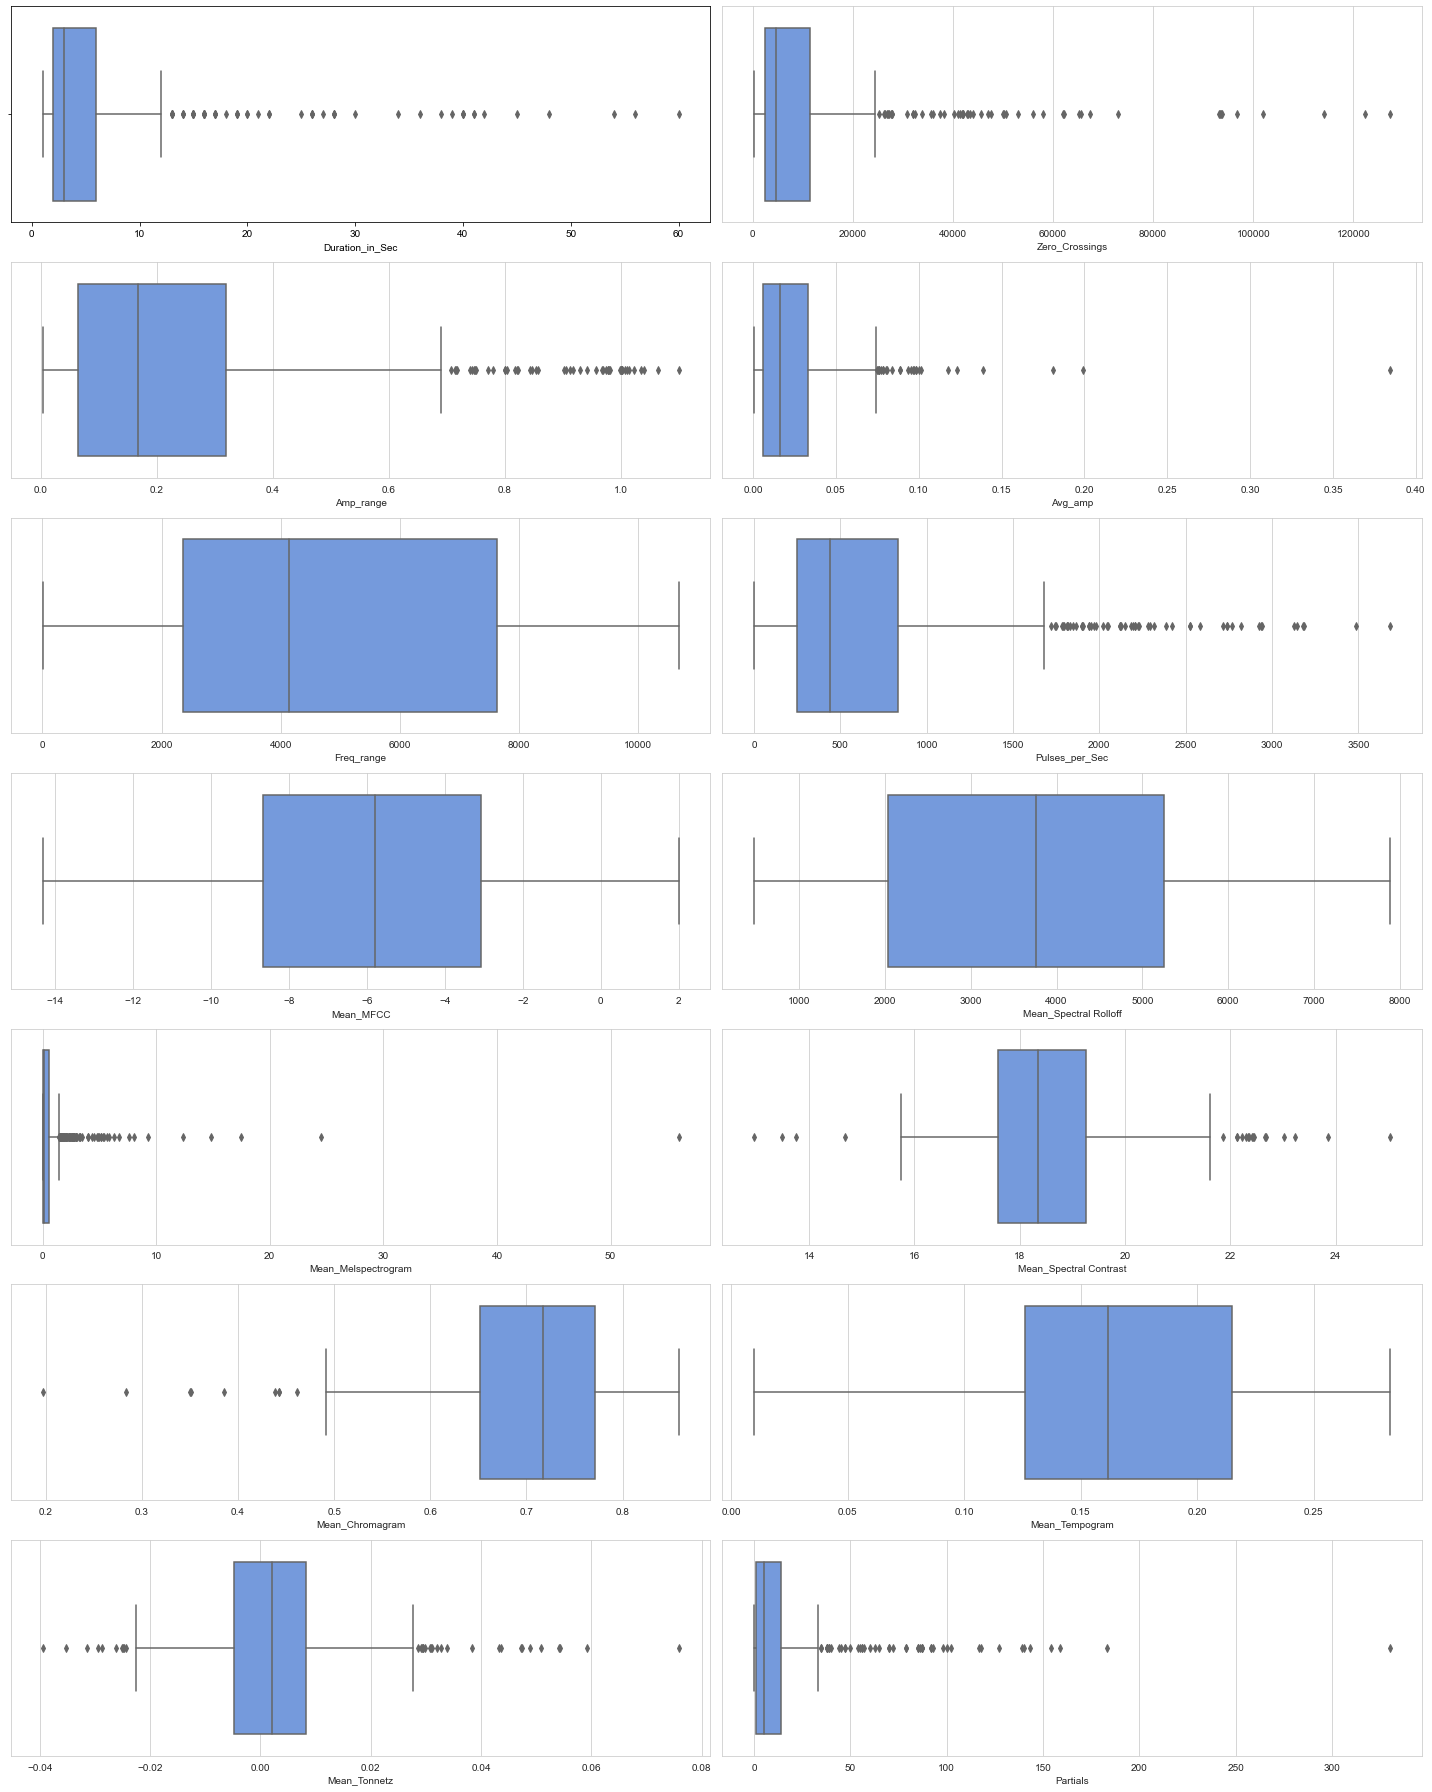

In [21]:
#Boxplot to check for outliers
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='cornflowerblue',orient='h')
    plt.tight_layout()
plt.show()    

## Standardize Continuous Features

In [22]:
continuous = ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))


In [23]:
df.describe(include='float64')

,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,-2.198461e-16,-7.035077e-17,-1.516938e-16,-8.024384e-17,1.593427e-16,7.630493e-17,-9.141935e-17,1.306253e-16,-6.705307e-17,-8.622549e-16,4.079062e-16,-2.148996e-16,-1.703808e-17,5.928518e-16,-3.444256e-17
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-6.056818e-01,-6.281743e-01,-9.788703e-01,-8.346163e-01,-1.512270e+00,-1.032406e+00,-2.765266e+00,-1.675580e+00,-2.740893e-01,-3.903678e+00,-5.728320e+00,-2.677252e+00,-3.331132e+00,-4.995044e-01,-8.405200e-01
25%,-4.766231e-01,-4.911906e-01,-7.262015e-01,-6.471603e-01,-7.919423e-01,-6.446062e-01,-9.273912e-01,-8.793354e-01,-2.688859e-01,-6.374606e-01,-5.974671e-01,-6.831830e-01,-5.953140e-01,-4.618412e-01,-6.531509e-01
50%,-3.475643e-01,-3.498196e-01,-3.063105e-01,-2.962446e-01,-2.502588e-01,-3.553257e-01,2.311873e-03,2.866181e-03,-2.281837e-01,-1.111064e-01,1.320428e-01,-7.238812e-02,-5.664781e-02,-3.111881e-01,-2.851899e-01
75%,3.961210e-02,6.642122e-02,3.106176e-01,3.014497e-01,8.202616e-01,2.544190e-01,8.865981e-01,7.650886e-01,-7.317707e-02,5.347889e-01,7.487765e-01,8.418126e-01,4.282221e-01,2.778132e-02,3.071547e-01
max,7.008787e+00,7.276403e+00,3.488946e+00,1.243855e+01,1.749604e+00,4.642283e+00,2.530087e+00,2.109091e+00,1.911150e+01,4.596504e+00,1.725078e+00,2.005211e+00,5.749711e+00,1.192937e+01,1.215483e+01


In [24]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)